# Megacam transmission as well as air transparency

## Data taken from

- http://supernovae.in2p3.fr/snls_sdss/


## other info on filters
- http://www.cfht.hawaii.edu/Instruments/Imaging/Megacam/specsinformation.html

In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
from PIL import Image

In [80]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

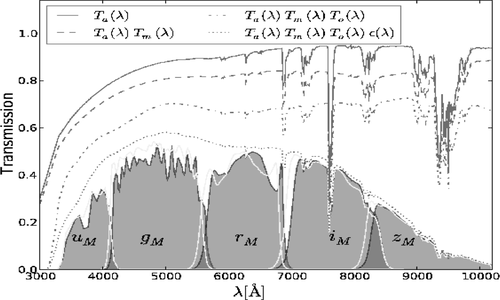

In [81]:
img=Image.open("Figures/every_transmission.png")
img = img.resize((500, 300),Image.ANTIALIAS)
display(img)

In [82]:
files = ['CFHT_MegaPrime_Transmission.dat', \
         'CFHT_Primary_Transmission.dat', \
         'QE_camera_high_res_model.dat', \
         'SNIFS_extinction_buton2012_with_tl_X1_25.dat']

In [83]:
file_u =["u0.list","u1.list","u2.list","u3.list","u4.list","u5.list","u6.list","u7.list","u8.list","u9.list"]
file_g =["g0.list","g1.list","g2.list","g3.list","g4.list","g5.list","g6.list","g7.list","g8.list","g9.list"]
file_r =["r0.list","r1.list","r2.list","r3.list","r4.list","r5.list","r6.list","r7.list","r8.list","r9.list"]
file_i =["i0.list","i1.list","i2.list","i3.list","i4.list","i5.list","i6.list","i7.list","i8.list","i9.list"]
file_z =["z0.list","z1.list","z2.list","z3.list","z4.list","z5.list","z6.list","z7.list","z8.list","z9.list"]
file_y =["y0.list","y1.list","y2.list","y3.list","y4.list","y5.list","y6.list","y7.list","y8.list","y9.list"]

In [84]:
path_transmissions="all_products_v3_2/MegaCam_v3.2/"

## CFHT_MegaPrime_Transmission

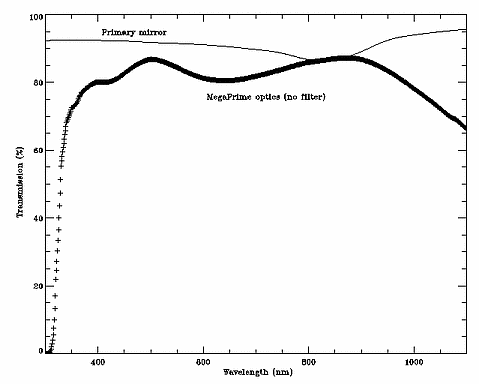

In [85]:
display(Image.open("Figures/MegaPrime-Optics-Transmission-75p.gif")) 

In [86]:
display("Figures/filters_transmissions.png")

'Figures/filters_transmissions.png'

In [87]:
df1=pd.read_table(os.path.join(path_transmissions,files[0]),sep=' ',names=["lambda","transm"],index_col=False)

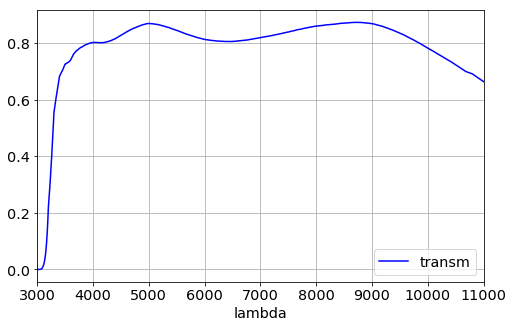

In [88]:
df1.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True)

## CFHT_Primary_Transmission

In [89]:
df2=pd.read_table(os.path.join(path_transmissions,files[1]),sep=' ',names=["lambda","transm"],index_col=False)

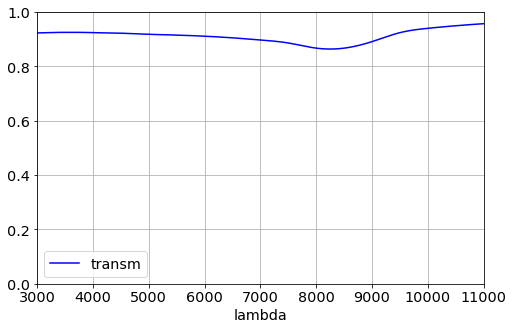

In [90]:
df2.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

## QE_camera_high_res_model.dat

In [91]:
df3=pd.read_table(os.path.join(path_transmissions,files[2]),sep=' ',names=["lambda","transm"],index_col=False)

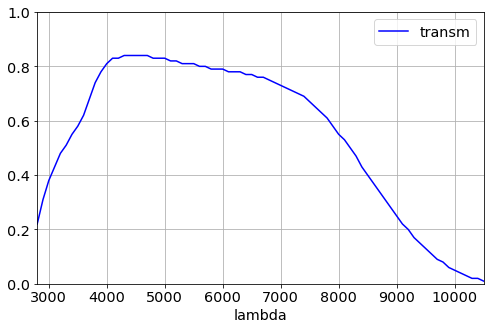

In [92]:
df3.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

## SNIFS_extinction_buton2012_with_tl_X1_25.dat

In [93]:
df4=pd.read_table(os.path.join(path_transmissions,files[3]),sep=' ',names=["lambda","transm"],index_col=False)

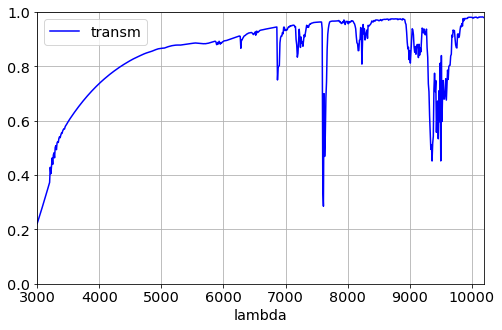

In [94]:
df4.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

# Filters 

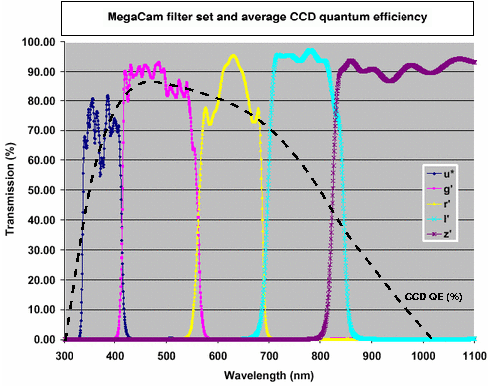

In [95]:
display(Image.open("Figures/MegaCamFilters+QE.gif")  )

In [96]:
dfu0=pd.read_table(os.path.join(path_transmissions,file_u[0]),sep=' ' ,skiprows=4,names=["lambda","u0"],index_col=False)
dfu1=pd.read_table(os.path.join(path_transmissions,file_u[1]),sep=' ' ,skiprows=4,names=["lambda","u1"],index_col=False)
dfu2=pd.read_table(os.path.join(path_transmissions,file_u[2]),sep=' ' ,skiprows=4,names=["lambda","u2"],index_col=False)
dfu3=pd.read_table(os.path.join(path_transmissions,file_u[3]),sep=' ' ,skiprows=4,names=["lambda","u3"],index_col=False)
dfu4=pd.read_table(os.path.join(path_transmissions,file_u[4]),sep=' ' ,skiprows=4,names=["lambda","u4"],index_col=False)
dfu5=pd.read_table(os.path.join(path_transmissions,file_u[5]),sep=' ' ,skiprows=4,names=["lambda","u5"],index_col=False)
dfu6=pd.read_table(os.path.join(path_transmissions,file_u[6]),sep=' ' ,skiprows=4,names=["lambda","u6"],index_col=False)
dfu7=pd.read_table(os.path.join(path_transmissions,file_u[7]),sep=' ' ,skiprows=4,names=["lambda","u7"],index_col=False)
dfu8=pd.read_table(os.path.join(path_transmissions,file_u[8]),sep=' ' ,skiprows=4,names=["lambda","u8"],index_col=False)
dfu9=pd.read_table(os.path.join(path_transmissions,file_u[9]),sep=' ' ,skiprows=4,names=["lambda","u9"],index_col=False)

In [97]:
#dfu0.describe() 

In [98]:
#dfu1.describe()

In [99]:
#dfu2.describe()

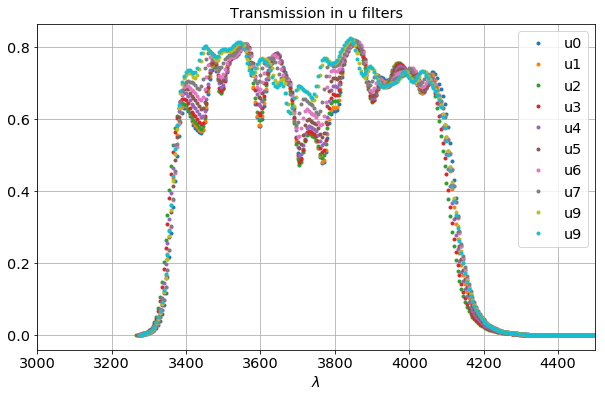

In [114]:
#plt.figure(figsize=(20,8))
plt.plot(dfu0["lambda"],dfu0["u0"],'.',label='u0')
plt.plot(dfu1["lambda"],dfu1["u1"],'.',label='u1')
plt.plot(dfu2["lambda"],dfu2["u2"],'.',label='u2')
plt.plot(dfu3["lambda"],dfu3["u3"],'.',label='u3')
plt.plot(dfu4["lambda"],dfu4["u4"],'.',label='u4')
plt.plot(dfu5["lambda"],dfu5["u5"],'.',label='u5')
plt.plot(dfu6["lambda"],dfu6["u6"],'.',label='u6')
plt.plot(dfu7["lambda"],dfu7["u7"],'.',label='u7')
plt.plot(dfu8["lambda"],dfu8["u8"],'.',label='u9')
plt.plot(dfu9["lambda"],dfu9["u9"],'.',label='u9')
plt.xlim(3000.,4500.)
plt.xlabel("$\lambda$")
plt.title("Transmission in u filters")
plt.grid()
plt.legend()

In [101]:
dfg0=pd.read_table(os.path.join(path_transmissions,file_g[0]),sep=' ' ,skiprows=4,names=["lambda","g0"],index_col=False)
dfg1=pd.read_table(os.path.join(path_transmissions,file_g[1]),sep=' ' ,skiprows=4,names=["lambda","g1"],index_col=False)
dfg2=pd.read_table(os.path.join(path_transmissions,file_g[2]),sep=' ' ,skiprows=4,names=["lambda","g2"],index_col=False)
dfg3=pd.read_table(os.path.join(path_transmissions,file_g[3]),sep=' ' ,skiprows=4,names=["lambda","g3"],index_col=False)
dfg4=pd.read_table(os.path.join(path_transmissions,file_g[4]),sep=' ' ,skiprows=4,names=["lambda","g4"],index_col=False)
dfg5=pd.read_table(os.path.join(path_transmissions,file_g[5]),sep=' ' ,skiprows=4,names=["lambda","g5"],index_col=False)
dfg6=pd.read_table(os.path.join(path_transmissions,file_g[6]),sep=' ' ,skiprows=4,names=["lambda","g6"],index_col=False)
dfg7=pd.read_table(os.path.join(path_transmissions,file_g[7]),sep=' ' ,skiprows=4,names=["lambda","g7"],index_col=False)
dfg8=pd.read_table(os.path.join(path_transmissions,file_g[8]),sep=' ' ,skiprows=4,names=["lambda","g8"],index_col=False)
dfg9=pd.read_table(os.path.join(path_transmissions,file_g[9]),sep=' ' ,skiprows=4,names=["lambda","g9"],index_col=False)

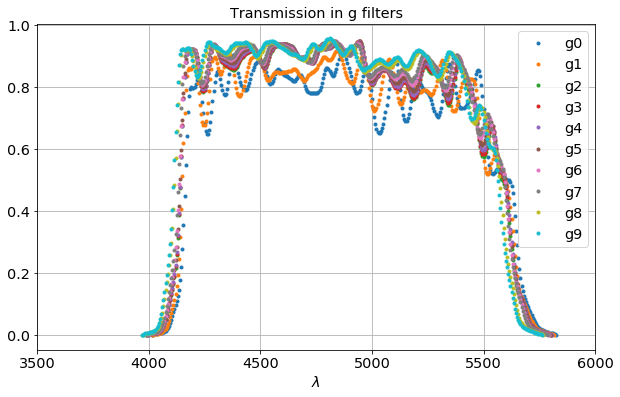

In [115]:
#plt.figure(figsize=(20,8))
plt.plot(dfg0["lambda"],dfg0["g0"],'.',label='g0')
plt.plot(dfg1["lambda"],dfg1["g1"],'.',label='g1')
plt.plot(dfg2["lambda"],dfg2["g2"],'.',label='g2')
plt.plot(dfg3["lambda"],dfg3["g3"],'.',label='g3')
plt.plot(dfg4["lambda"],dfg4["g4"],'.',label='g4')
plt.plot(dfg5["lambda"],dfg5["g5"],'.',label='g5')
plt.plot(dfg6["lambda"],dfg6["g6"],'.',label='g6')
plt.plot(dfg7["lambda"],dfg7["g7"],'.',label='g7')
plt.plot(dfg8["lambda"],dfg8["g8"],'.',label='g8')
plt.plot(dfg9["lambda"],dfg9["g9"],'.',label='g9')
plt.xlim(3500.,6000.)
plt.xlabel("$\lambda$")
plt.title("Transmission in g filters")
plt.grid()
plt.legend()

In [103]:
dfr0=pd.read_table(os.path.join(path_transmissions,file_r[0]),sep=' ' ,skiprows=4,names=["lambda","r0"],index_col=False)
dfr1=pd.read_table(os.path.join(path_transmissions,file_r[1]),sep=' ' ,skiprows=4,names=["lambda","r1"],index_col=False)
dfr2=pd.read_table(os.path.join(path_transmissions,file_r[2]),sep=' ' ,skiprows=4,names=["lambda","r2"],index_col=False)
dfr3=pd.read_table(os.path.join(path_transmissions,file_r[3]),sep=' ' ,skiprows=4,names=["lambda","r3"],index_col=False)
dfr4=pd.read_table(os.path.join(path_transmissions,file_r[4]),sep=' ' ,skiprows=4,names=["lambda","r4"],index_col=False)
dfr5=pd.read_table(os.path.join(path_transmissions,file_r[5]),sep=' ' ,skiprows=4,names=["lambda","r5"],index_col=False)
dfr6=pd.read_table(os.path.join(path_transmissions,file_r[6]),sep=' ' ,skiprows=4,names=["lambda","r6"],index_col=False)
dfr7=pd.read_table(os.path.join(path_transmissions,file_r[7]),sep=' ' ,skiprows=4,names=["lambda","r7"],index_col=False)
dfr8=pd.read_table(os.path.join(path_transmissions,file_r[8]),sep=' ' ,skiprows=4,names=["lambda","r8"],index_col=False)
dfr9=pd.read_table(os.path.join(path_transmissions,file_r[9]),sep=' ' ,skiprows=4,names=["lambda","r9"],index_col=False)

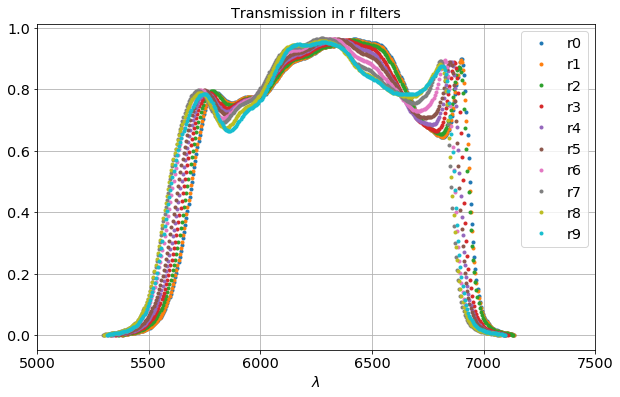

In [116]:
#plt.figure(figsize=(20,8))
plt.plot(dfr0["lambda"],dfr0["r0"],'.',label='r0')
plt.plot(dfr1["lambda"],dfr1["r1"],'.',label='r1')
plt.plot(dfr2["lambda"],dfr2["r2"],'.',label='r2')
plt.plot(dfr3["lambda"],dfr3["r3"],'.',label='r3')
plt.plot(dfr4["lambda"],dfr4["r4"],'.',label='r4')
plt.plot(dfr5["lambda"],dfr5["r5"],'.',label='r5')
plt.plot(dfr6["lambda"],dfr6["r6"],'.',label='r6')
plt.plot(dfr7["lambda"],dfr7["r7"],'.',label='r7')
plt.plot(dfr8["lambda"],dfr8["r8"],'.',label='r8')
plt.plot(dfr9["lambda"],dfr9["r9"],'.',label='r9')
plt.xlim(5000.,7500.)
plt.xlabel("$\lambda$")
plt.title("Transmission in r filters")
plt.grid()
plt.legend()

In [105]:
dfi0=pd.read_table(os.path.join(path_transmissions,file_i[0]),sep=' ' ,skiprows=4,names=["lambda","i0"],index_col=False)
dfi1=pd.read_table(os.path.join(path_transmissions,file_i[1]),sep=' ' ,skiprows=4,names=["lambda","i1"],index_col=False)
dfi2=pd.read_table(os.path.join(path_transmissions,file_i[2]),sep=' ' ,skiprows=4,names=["lambda","i2"],index_col=False)
dfi3=pd.read_table(os.path.join(path_transmissions,file_i[3]),sep=' ' ,skiprows=4,names=["lambda","i3"],index_col=False)
dfi4=pd.read_table(os.path.join(path_transmissions,file_i[4]),sep=' ' ,skiprows=4,names=["lambda","i4"],index_col=False)
dfi5=pd.read_table(os.path.join(path_transmissions,file_i[5]),sep=' ' ,skiprows=4,names=["lambda","i5"],index_col=False)
dfi6=pd.read_table(os.path.join(path_transmissions,file_i[6]),sep=' ' ,skiprows=4,names=["lambda","i6"],index_col=False)
dfi7=pd.read_table(os.path.join(path_transmissions,file_i[7]),sep=' ' ,skiprows=4,names=["lambda","i7"],index_col=False)
dfi8=pd.read_table(os.path.join(path_transmissions,file_i[8]),sep=' ' ,skiprows=4,names=["lambda","i8"],index_col=False)
dfi9=pd.read_table(os.path.join(path_transmissions,file_i[9]),sep=' ' ,skiprows=4,names=["lambda","i9"],index_col=False)

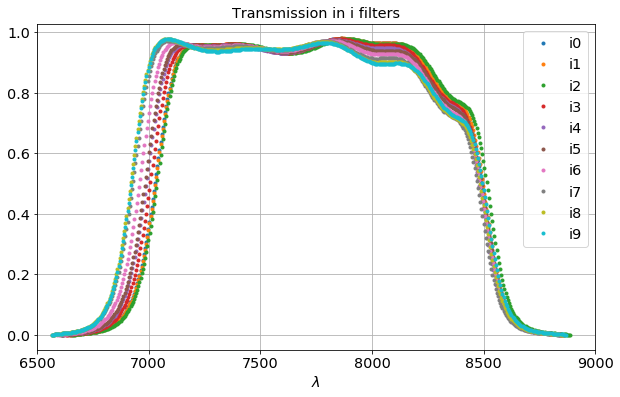

In [117]:
#plt.figure(figsize=(20,8))
plt.plot(dfi0["lambda"],dfi0["i0"],'.',label='i0')
plt.plot(dfi1["lambda"],dfi1["i1"],'.',label='i1')
plt.plot(dfi2["lambda"],dfi2["i2"],'.',label='i2')
plt.plot(dfi3["lambda"],dfi3["i3"],'.',label='i3')
plt.plot(dfi4["lambda"],dfi4["i4"],'.',label='i4')
plt.plot(dfi5["lambda"],dfi5["i5"],'.',label='i5')
plt.plot(dfi6["lambda"],dfi6["i6"],'.',label='i6')
plt.plot(dfi7["lambda"],dfi7["i7"],'.',label='i7')
plt.plot(dfi8["lambda"],dfi8["i8"],'.',label='i8')
plt.plot(dfi9["lambda"],dfi9["i9"],'.',label='i9')
plt.xlim(6500.,9000.)
plt.xlabel("$\lambda$")
plt.title("Transmission in i filters")
plt.grid()
plt.legend()

In [107]:
dfz0=pd.read_table(os.path.join(path_transmissions,file_z[0]),sep=' ' ,skiprows=4,names=["lambda","z0"],index_col=False)
dfz1=pd.read_table(os.path.join(path_transmissions,file_z[1]),sep=' ' ,skiprows=4,names=["lambda","z1"],index_col=False)
dfz2=pd.read_table(os.path.join(path_transmissions,file_z[2]),sep=' ' ,skiprows=4,names=["lambda","z2"],index_col=False)
dfz3=pd.read_table(os.path.join(path_transmissions,file_z[3]),sep=' ' ,skiprows=4,names=["lambda","z3"],index_col=False)
dfz4=pd.read_table(os.path.join(path_transmissions,file_z[4]),sep=' ' ,skiprows=4,names=["lambda","z4"],index_col=False)
dfz5=pd.read_table(os.path.join(path_transmissions,file_z[5]),sep=' ' ,skiprows=4,names=["lambda","z5"],index_col=False)
dfz6=pd.read_table(os.path.join(path_transmissions,file_z[6]),sep=' ' ,skiprows=4,names=["lambda","z6"],index_col=False)
dfz7=pd.read_table(os.path.join(path_transmissions,file_z[7]),sep=' ' ,skiprows=4,names=["lambda","z7"],index_col=False)
dfz8=pd.read_table(os.path.join(path_transmissions,file_z[8]),sep=' ' ,skiprows=4,names=["lambda","z8"],index_col=False)
dfz9=pd.read_table(os.path.join(path_transmissions,file_z[9]),sep=' ' ,skiprows=4,names=["lambda","z9"],index_col=False)

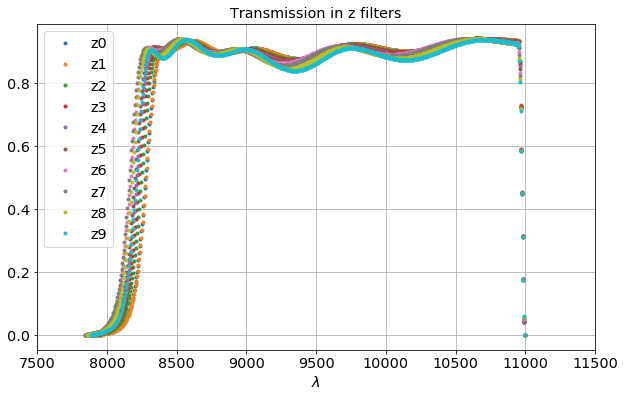

In [126]:
#plt.figure(figsize=(20,8))
plt.plot(dfz0["lambda"],dfz0["z0"],'.',label='z0')
plt.plot(dfz1["lambda"],dfz1["z1"],'.',label='z1')
plt.plot(dfz2["lambda"],dfz2["z2"],'.',label='z2')
plt.plot(dfz3["lambda"],dfz3["z3"],'.',label='z3')
plt.plot(dfz4["lambda"],dfz4["z4"],'.',label='z4')
plt.plot(dfz5["lambda"],dfz5["z5"],'.',label='z5')
plt.plot(dfz6["lambda"],dfz6["z6"],'.',label='z6')
plt.plot(dfz7["lambda"],dfz7["z7"],'.',label='z7')
plt.plot(dfz8["lambda"],dfz8["z8"],'.',label='z8')
plt.plot(dfz9["lambda"],dfz9["z9"],'.',label='z9')
plt.xlim(7500.,11500.)
plt.xlabel("$\lambda$")
plt.title("Transmission in z filters")
plt.grid()
plt.legend()

In [109]:
dfy0=pd.read_table(os.path.join(path_transmissions,file_y[0]),sep=' ' ,skiprows=4,names=["lambda","y0"],index_col=False)
dfy1=pd.read_table(os.path.join(path_transmissions,file_y[1]),sep=' ' ,skiprows=4,names=["lambda","y1"],index_col=False)
dfy2=pd.read_table(os.path.join(path_transmissions,file_y[2]),sep=' ' ,skiprows=4,names=["lambda","y2"],index_col=False)
dfy3=pd.read_table(os.path.join(path_transmissions,file_y[3]),sep=' ' ,skiprows=4,names=["lambda","y3"],index_col=False)
dfy4=pd.read_table(os.path.join(path_transmissions,file_y[4]),sep=' ' ,skiprows=4,names=["lambda","y4"],index_col=False)
dfy5=pd.read_table(os.path.join(path_transmissions,file_y[5]),sep=' ' ,skiprows=4,names=["lambda","y5"],index_col=False)
dfy6=pd.read_table(os.path.join(path_transmissions,file_y[6]),sep=' ' ,skiprows=4,names=["lambda","y6"],index_col=False)
dfy7=pd.read_table(os.path.join(path_transmissions,file_y[7]),sep=' ' ,skiprows=4,names=["lambda","y7"],index_col=False)
dfy8=pd.read_table(os.path.join(path_transmissions,file_y[8]),sep=' ' ,skiprows=4,names=["lambda","y8"],index_col=False)
dfy9=pd.read_table(os.path.join(path_transmissions,file_y[9]),sep=' ' ,skiprows=4,names=["lambda","y9"],index_col=False)

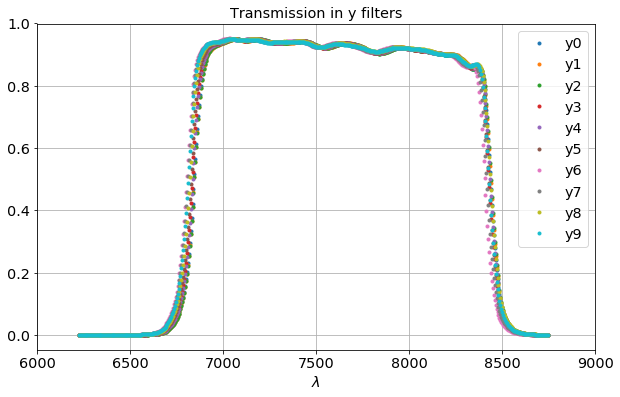

In [124]:
#plt.figure(figsize=(20,8))
plt.plot(dfy0["lambda"],dfy0["y0"],'.',label='y0')
plt.plot(dfy1["lambda"],dfy1["y1"],'.',label='y1')
plt.plot(dfy2["lambda"],dfy2["y2"],'.',label='y2')
plt.plot(dfy3["lambda"],dfy3["y3"],'.',label='y3')
plt.plot(dfy4["lambda"],dfy4["y4"],'.',label='y4')
plt.plot(dfy5["lambda"],dfy5["y5"],'.',label='y5')
plt.plot(dfy6["lambda"],dfy6["y6"],'.',label='y6')
plt.plot(dfy7["lambda"],dfy7["y7"],'.',label='y7')
plt.plot(dfy8["lambda"],dfy8["y8"],'.',label='y8')
plt.plot(dfy9["lambda"],dfy9["y9"],'.',label='y9')
plt.xlim(6000.,9000.)
plt.xlabel("$\lambda$")
plt.title("Transmission in y filters")
plt.grid()
plt.legend()

In [111]:
#df_filters=pd.merge(dfu0,dfg0, how='left',left_on=["lambda","u0"],right_on=["lambda","g0"] )

Text(0.5,1,u'Transmission in SNLS filters')

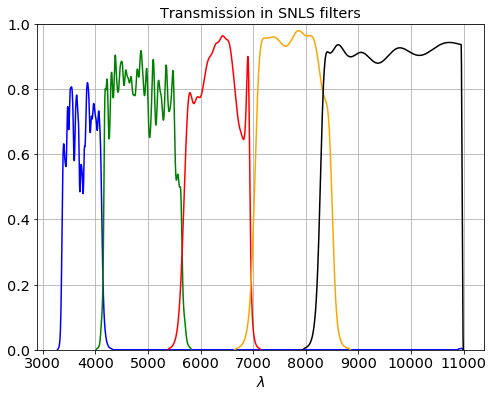

In [120]:
plt.figure(figsize=(8,6))
plt.plot(dfu0["lambda"],dfu0["u0"],color="b")
plt.plot(dfg0["lambda"],dfg0["g0"],color="g")
plt.plot(dfr0["lambda"],dfr0["r0"],color="r")
plt.plot(dfi0["lambda"],dfi0["i0"],color="orange")
plt.plot(dfz0["lambda"],dfz0["z0"],color="k")
#plt.plot(dfy0["lambda"],dfy0["y0"],color="grey")
plt.grid()
plt.ylim(0,1)
plt.xlabel("$\lambda$")
plt.title("Transmission in SNLS filters")

Text(0.5,1,u'Transmission in SNLS filters')

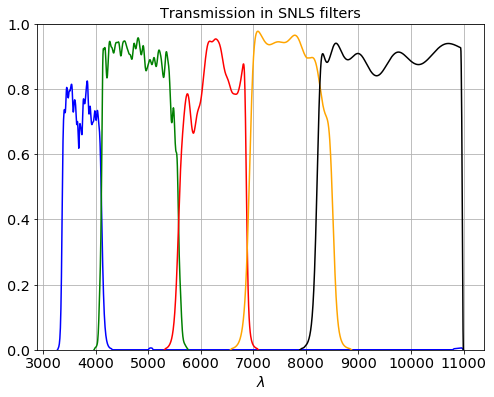

In [122]:
plt.figure(figsize=(8,6))
plt.plot(dfu9["lambda"],dfu9["u9"],color="b")
plt.plot(dfg9["lambda"],dfg9["g9"],color="g")
plt.plot(dfr9["lambda"],dfr9["r9"],color="r")
plt.plot(dfi9["lambda"],dfi9["i9"],color="orange")
plt.plot(dfz9["lambda"],dfz9["z9"],color="k")
#plt.plot(dfy9["lambda"],dfy9["y9"],color="grey")
plt.grid()
plt.ylim(0,1)
plt.xlabel("$\lambda$")
plt.title("Transmission in SNLS filters")